In [1]:
import torch
import numpy as np
import pickle
import os
import sys
import matplotlib.pyplot as plt

from utils.loss import rmse, rmse_tsf, mse
from model.dendinet import DendiNet
from utils.F_train_validate_dendinet import fit, validate
from configs.DendiNet_configs import Configs

# return to main dir
current_directory = os.getcwd()
main_dir = os.path.dirname(current_directory+'/dataloader/')
sys.path.append(main_dir)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'avaiable device: {device}')

avaiable device: cuda


In [2]:
# random seed
seed = 77
torch.manual_seed(seed)
np.random.seed(seed)

if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [3]:
with open('dataloader/save/DendiNet/train_loader.pkl', 'rb') as file:
    train_loader_Dendinet = pickle.load(file)
with open('dataloader/save/DendiNet/val_loader.pkl', 'rb') as file:
    val_loader_Dendinet = pickle.load(file)
print('training and validation dataloaders are loaded!')

training and validation dataloaders are loaded!


In [4]:
# training setting
epochs = 70
es_patience = 10 # early stop
lr = 1e-6
model_save_dir = os.path.dirname(main_dir) + '/model_save/DendiNet.pth'

In [5]:
configs = Configs()
Dendinet_model = DendiNet(configs).to(device)
Dendinet_optimizer = torch.optim.Adam(Dendinet_model.parameters(), lr=lr)

Dendinet_train_loss, Dendinet_val_loss = fit(Dendinet_model, epochs, train_loader_Dendinet, val_loader_Dendinet,
                                             Dendinet_optimizer, mse, es_patience=es_patience, model_save_dir=model_save_dir,
                                             device=device)

/root/miniconda3/lib/python3.8/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Epoch No.1 || Training loss: 0.000816 || Validation loss: 0.000343 || Time: 103.96 sec
Epoch No.2 || Training loss: 0.000531 || Validation loss: 0.000274 || Time: 101.227 sec
Epoch No.3 || Training loss: 0.000428 || Validation loss: 0.000178 || Time: 102.98 sec
Epoch No.4 || Training loss: 0.000347 || Validation loss: 0.000134 || Time: 103.11 sec
Epoch No.5 || Training loss: 0.000303 || Validation loss: 0.000134 || Time: 103.681 sec
Epoch No.6 || Training loss: 0.000276 || Validation loss: 0.000137 || Time: 101.908 sec
Epoch No.7 || Training loss: 0.000259 || Validation loss: 0.000139 || Time: 104.097 sec
Epoch No.8 || Training loss: 0.000245 || Validation loss: 0.000138 || Time: 106.27 sec
Epoch No.9 || Training loss: 0.000235 || Validation loss: 0.000133 || Time: 102.84 sec
Epoch No.10 || Training loss: 0.000226 || Validation loss: 0.000129 || Time: 102.963 sec
Epoch No.11 || Training loss: 0.000219 || Validation loss: 0.000124 || Time: 103.71 sec
Epoch No.12 || Training loss: 0.0002

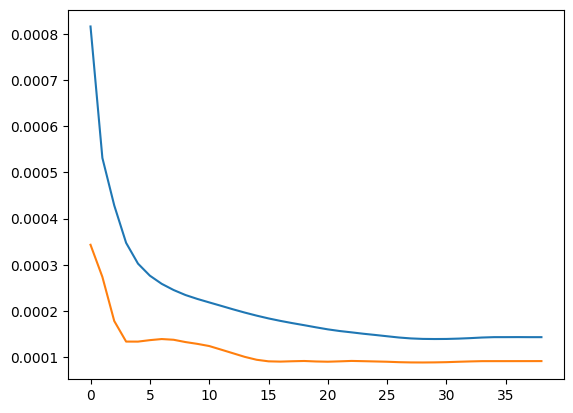

In [6]:
plt.plot(Dendinet_train_loss)
plt.plot(Dendinet_val_loss)

In [7]:
with open('dataloader/save/DendiNet/US06_test_loader.pkl', 'rb') as file:
    US06_loader_Dendinet = pickle.load(file)
with open('dataloader/save/DendiNet/HWFTa_test_loader.pkl', 'rb') as file:
    HWFTa_test_loader_Dendinet = pickle.load(file)
with open('dataloader/save/DendiNet/HWFTb_test_loader.pkl', 'rb') as file:
    HWFTb_test_loader_Dendinet = pickle.load(file)
with open('dataloader/save/DendiNet/eneroc_test_loader.pkl', 'rb') as file:
    eneroc_test_loader_Dendinet = pickle.load(file)
print(f'Test dataloaders are loaded!')

Test dataloaders are loaded!


In [8]:
# load best model
best_model = DendiNet(configs).to(device)
best_model.load_state_dict(torch.load(model_save_dir))

<All keys matched successfully>

RMSE Loss: 0.00019224712741561234


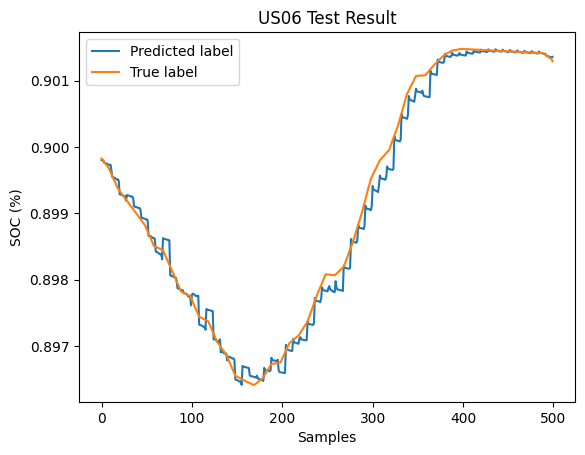

In [9]:
US06_val_loss_epoch, US06_target_log, US06_pred_log = validate(best_model, US06_loader_Dendinet, mse, device=device)

plt.plot(US06_pred_log.reshape(-1)[4500:5000].cpu(), label='Predicted label')
plt.plot(US06_target_log.reshape(-1)[4500:5000].cpu(), label='True label')
plt.title('US06 Test Result')
plt.xlabel('Samples')
plt.ylabel('SOC (%)')
plt.legend()
print(f'RMSE Loss: {rmse(US06_pred_log, US06_target_log)}')

RMSE Loss: 5.7494777138344944e-05


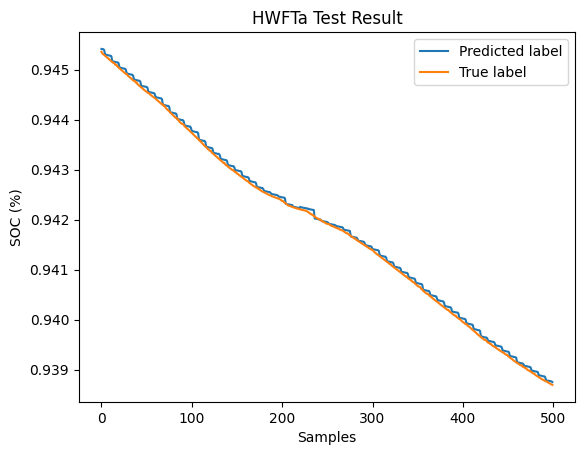

In [10]:
HWFTa_val_loss_epoch, HWFTa_target_log, HWFTa_pred_log = validate(best_model, HWFTa_test_loader_Dendinet, mse, device=device)

plt.plot(HWFTa_pred_log.reshape(-1)[4500:5000].cpu(), label='Predicted label')
plt.plot(HWFTa_target_log.reshape(-1)[4500:5000].cpu(), label='True label')
plt.legend()
plt.title('HWFTa Test Result')
plt.xlabel('Samples')
plt.ylabel('SOC (%)')
plt.legend()
print(f'RMSE Loss: {rmse(HWFTa_pred_log, HWFTa_target_log)}')

RMSE Loss: 5.784039603895508e-05


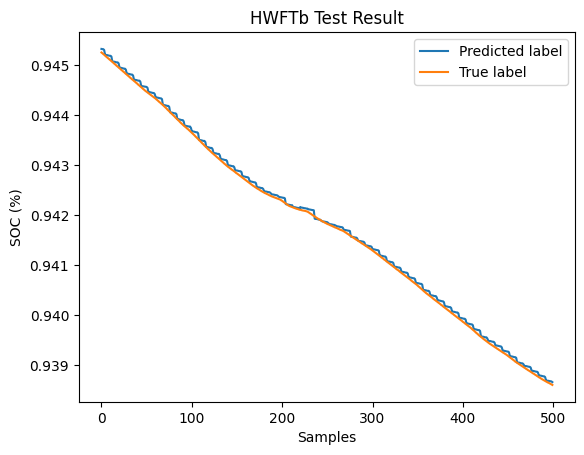

In [11]:
HWFTb_val_loss_epoch, HWFTb_target_log, HWFTb_pred_log = validate(best_model, HWFTb_test_loader_Dendinet, mse, device=device)

plt.plot(HWFTb_pred_log.reshape(-1)[4500:5000].cpu(), label='Predicted label')
plt.plot(HWFTb_target_log.reshape(-1)[4500:5000].cpu(), label='True label')
plt.legend()
plt.title('HWFTb Test Result')
plt.xlabel('Samples')
plt.ylabel('SOC (%)')
plt.legend()
print(f'RMSE Loss: {rmse(HWFTb_pred_log, HWFTb_target_log)}')

RMSE Loss: 0.0014690971001982689


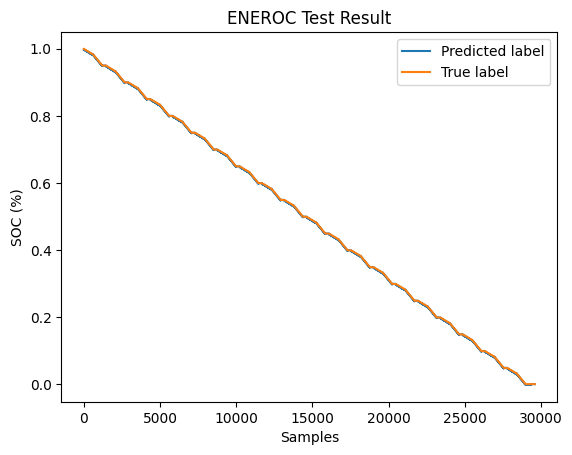

In [12]:
eneroc_val_loss_epoch, eneroc_target_log, eneroc_pred_log = validate(best_model, eneroc_test_loader_Dendinet, mse, device=device)

plt.plot(eneroc_pred_log.reshape(-1).cpu(), label='Predicted label')
plt.plot(eneroc_target_log.reshape(-1).cpu(), label='True label')
plt.legend()
plt.title('ENEROC Test Result')
plt.xlabel('Samples')
plt.ylabel('SOC (%)')
plt.legend()
print(f'RMSE Loss: {rmse(eneroc_pred_log, eneroc_target_log)}')

RMSE Loss: 0.00019224712741561234


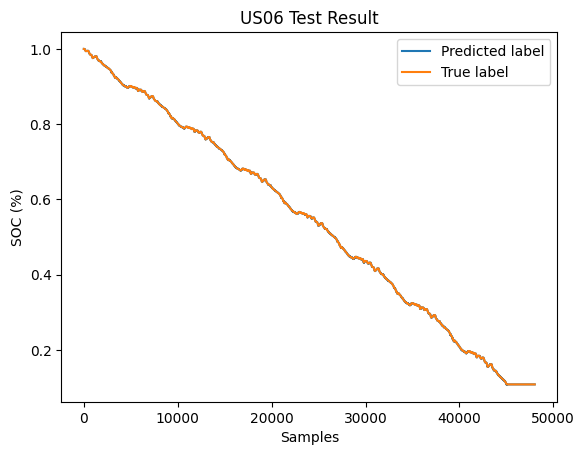

In [13]:
US06_val_loss_epoch, US06_target_log, US06_pred_log = validate(best_model, US06_loader_Dendinet, mse, device=device)

plt.plot(US06_pred_log.reshape(-1).cpu(), label='Predicted label')
plt.plot(US06_target_log.reshape(-1).cpu(), label='True label')
plt.title('US06 Test Result')
plt.xlabel('Samples')
plt.ylabel('SOC (%)')
plt.legend()
print(f'RMSE Loss: {rmse(US06_pred_log, US06_target_log)}')